# Week 6 assignment

by @nirvanafish


给定一个函数 $$ f(x) = x^2 + 3x - 10 $$

## 理解方程求根中的二分法(Bisection)，并使用基本的numpy库而非scipy库，来实现算法 

- 参考[wiki算法定义](https://en.wikipedia.org/wiki/Bisection_method)
- 使用上述算法来得到函数f(x)的根  

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

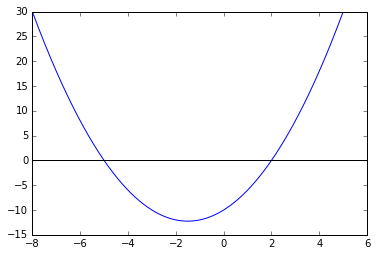

In [2]:
f = lambda x: x**2 + 3 * x - 10
x = np.linspace(-8, 5, 1000)
y = f(x)
plt.plot(x, y);
plt.axhline(0, color='k')

- 迭代二分法
    - 前提：
        - a root is bracketed in the interval \\((a, b)\\) : \\(f(a)\\) and \\(f(b)\\) have opposite signs; function is continuous
        - 因为这段区间的端点对应的值正负号不一致，连续函数必然其中有一个根节点
    - 看区间的中点 \\(c\\) 值是否为0或者下一次迭代的区间长度低于设定的精度 \\(tol\\)
        - 如果是，则为所求方程的根
        - 如果跟左端点的值正负号相同，则所求根的区域不在 \\((a, c)\\) 中，迭代函数对 \\((c, b)\\) 区域求解
        - 反则迭代函数对 \\((c, b)\\) 区域求解
    - 因为每次迭代后区间长度减半 \\(\epsilon_{n+1} = \epsilon_n / 2 \\) , i.e. linear convergence
        - 给定精度\\(\epsilon\\)后，总迭代次数为
        $$ n = \log_2 \frac{\epsilon_0}{\epsilon} $$
        where  $$ \epsilon_0 = b - a $$

In [31]:
def bisect(f, a, b, tol = 1e-15):
    if f(a) * f(b) > 0:
    # if np.sign(a) == np.sign(b): 
        raise Exception("f(a) and f(b) must have different signs ") 
    if a >= b:
        raise Exception("a must be smaller than b ") 
    if f(a) == 0:
        return a
    if f(b) == 0:
        return b
    c = (a + b)/2
    if (f(c) == 0) | ((b - a)/2 < tol):
        return c
    if f(a) * f(c) > 0:
        return(bisect(f, c, b))
    else:
        return(bisect(f, a, c))
        

In [36]:
bisect(f, 0, 10)

2.0

约迭代50次至收敛

In [40]:
np.log2(1e16)

53.150849518197795

In [37]:
bisect(f, -10, 0)

-5.0

In [35]:
%timeit bisect(f, 0, 10)

1000 loops, best of 3: 232 µs per loop


In [34]:
%timeit bisect(f, -10, 0)

100000 loops, best of 3: 3.64 µs per loop


- 参考[scipy source code](https://github.com/scipy/scipy/blob/v0.17.0/scipy/optimize/Zeros/bisect.c) 
    - 增加了 \\(rtol\\) 参数，考虑到 relative precision of doubles
    - 增加了 \\(maxiter \\) 参数

In [64]:
%timeit bisect(f, -4, 10, tol = 1e-12)

1000 loops, best of 3: 233 µs per loop


In [3]:
def bisect2(f, xa, xb, xtol=1e-12, rtol=4.4408920985006262e-16, maxiter=100):
    tol = xtol + rtol*(np.abs(xa) + np.abs(xb))
    if f(xa) * f(xb) > 0:
    # if np.sign(a) == np.sign(b): 
        raise Exception("f(xa) and f(xb) must have different signs ") 
    if xa >= xb:
        raise Exception("xa must be smaller than xb ") 
    if f(xa) == 0:
        return xa
    if f(xb) == 0:
        return xb
    dm = xb - xa
    fa = f(xa)
    fb = f(xb)
    for i in range(0, maxiter): 
        dm *= .5
        xm = xa + dm
        fm = f(xm)
        if (fm*fa >= 0): 
            xa = xm
        if (fm == 0 )| (np.abs(dm) < tol) :
            return xm

    return xa


In [4]:
bisect2(f, -4, 10)

1.9999999999994316

In [65]:
%timeit bisect2(f, -4, 10)

1000 loops, best of 3: 219 µs per loop


得到的数值精度和运算速度差不多

## 理解梯度下降法(Gradient descent)，并使用基本的numpy库而非scipy库，来实现算法 
- 基础概念参考[scipy lectures](http://www.scipy-lectures.org/advanced/mathematical_optimization/)
    - 搜索方向：目前所在位置的梯度下降 \\(\Delta x\\)
    - 搜索步长：固定步长或使用线性搜索得到最佳步长
- 算法参考[Gradient descent wiki](https://en.wikipedia.org/wiki/Gradient_descent)
    - 最速梯度下降是保证局部收敛的
- 使用上述算法来得到函数f(x)的最小值  

- 固定步长的steepest梯度下降法
    - 迭代收敛很慢
    - 性能与假设的初始位置和error精度相关

Local minimum occurs at -1.5 after  1538 times of repetition


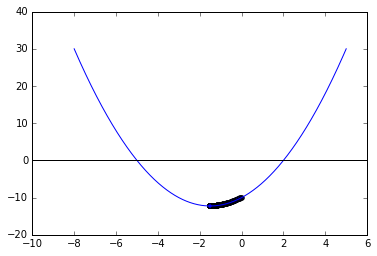

In [15]:
f = lambda x: x**2 + 3 * x - 10
# From plot view, we expect that the local minimum occurs at [-2, 0]

x_old = 0
gamma = 0.01 # step size
iteration = 0
maxIter = 10000
error = 10
precision = 1e-15
X = [x_old]
Y = [f(x_old)]

def f_derivative(x):
    return 2 * x +3

while abs(error) > precision and iteration < maxIter:
    iteration += 1
    x_new = x_old - gamma * f_derivative(x_old)
    error = x_new - x_old
    x_old = x_new
    X.append(x_new)
    Y.append(f(x_new))
    
print"Local minimum occurs at", x_new, "after ", iteration, "times of repetition"
x = np.linspace(-8, 5, 1000)
y = f(x)
plt.plot(x, y);
plt.axhline(0, color='k')
plt.scatter(X, Y)

- use exact line search to choose step size at each step
$$ \alpha =  \underset{\gamma>0}{\operatorname{argmin}} f(x+ \gamma \Delta x) $$
    - 使用numpy的[argmin](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.argmin.html)函数

Local minimum occurs at -1.5 after  2 times of repetition


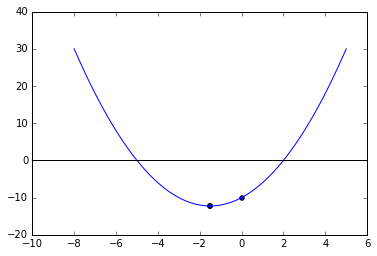

In [16]:
f = lambda x: x**2 + 3 * x - 10
# From plot view, we expect that the local minimum occurs at [-2, 0]

x_old = 0
iteration = 0
maxIter = 10000
error = 10
precision = 1e-15
X = [x_old]
Y = [f(x_old)]

def f_derivative(x):
    return 2 * x +3

while abs(error) > precision and iteration < maxIter:
    iteration += 1    
    gamma = np.arange(0,2,0.01)[1:]
    alpha =gamma[np.argmin(f(x_old - gamma*f_derivative(x_old)))]
    x_new = x_old - alpha * f_derivative(x_old)
    error = x_new - x_old
    x_old = x_new
    X.append(x_new)
    Y.append(f(x_new))

print "Local minimum occurs at", x_new, "after ", iteration, "times of repetition"
x = np.linspace(-8, 5, 1000)
y = f(x)
plt.plot(x, y);
plt.axhline(0, color='k')
plt.scatter(X, Y)

- 使用backtracking line search

Local minimum occurs at -1.5 after  2 times of repetition


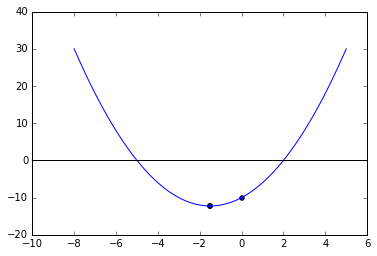

In [18]:
f = lambda x: x**2 + 3 * x - 10
# From plot view, we expect that the local minimum occurs at [-2, 0]

x_old = 0
alpha = 0.25
beta = 0.8
iteration = 0
maxIter = 10000
error = 10
precision = 1e-15
X = [x_old]
Y = [f(x_old)]

def f_derivative(x):
    return 2 * x +3

while abs(error) > precision and iteration < maxIter:
    iteration += 1 
    gradient = f_derivative(x_old)
    t = 1.0
    while f(x_old - t * gradient) > f(x_old) - alpha * t * gradient**2:
        t *= beta
    x = x - t * gradient
    error = x_new - x_old
    x_old = x_new
    X.append(x_new)
    Y.append(f(x_new))

print "Local minimum occurs at", x_new, "after ", iteration, "times of repetition"
x = np.linspace(-8, 5, 1000)
y = f(x)
plt.plot(x, y);
plt.axhline(0, color='k')
plt.scatter(X, Y)

- 尝试使用Wolfe line search
   - 参考scipy scalar_search_wolfe2的source code，暂未成功实现

In [13]:
f = lambda x: x**2 + 3 * x - 10
def f_derivative(x):
    return 2 * x +3
scalar_search_wolfe2(f, f_derivative)

(None, None, -10.0, None)

In [4]:
def scalar_search_wolfe2(phi, derphi=None, phi0=None,
                         old_phi0=None, derphi0=None,
                         c1=1e-4, c2=0.9, amax=50):
    """Find alpha that satisfies strong Wolfe conditions.
    alpha > 0 is assumed to be a descent direction.
    Parameters
    ----------
    phi : callable f(x)
        Objective scalar function.
    derphi : callable f'(x), optional
        Objective function derivative (can be None)
    phi0 : float, optional
        Value of phi at s=0
    old_phi0 : float, optional
        Value of phi at previous point
    derphi0 : float, optional
        Value of derphi at s=0
    c1 : float, optional
        Parameter for Armijo condition rule.
    c2 : float, optional
        Parameter for curvature condition rule.
    amax : float, optional
        Maximum step size
    Returns
    -------
    alpha_star : float or None
        Best alpha, or None if the line search algorithm did not converge.
    phi_star : float
        phi at alpha_star
    phi0 : float
        phi at 0
    derphi_star : float or None
        derphi at alpha_star, or None if the line search algorithm
        did not converge.
    Notes
    -----
    Uses the line search algorithm to enforce strong Wolfe
    conditions.  See Wright and Nocedal, 'Numerical Optimization',
    1999, pg. 59-60.
    For the zoom phase it uses an algorithm by [...].
    """

    if phi0 is None:
        phi0 = phi(0.)

    if derphi0 is None and derphi is not None:
        derphi0 = derphi(0.)

    alpha0 = 0
    if old_phi0 is not None and derphi0 != 0:
        alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
    else:
        alpha1 = 1.0

    if alpha1 < 0:
        alpha1 = 1.0

    if alpha1 == 0:
        # This shouldn't happen. Perhaps the increment has slipped below
        # machine precision?  For now, set the return variables skip the
        # useless while loop, and raise warnflag=2 due to possible imprecision.
        alpha_star = None
        phi_star = phi0
        phi0 = old_phi0
        derphi_star = None

    phi_a1 = phi(alpha1)
    #derphi_a1 = derphi(alpha1)  evaluated below

    phi_a0 = phi0
    derphi_a0 = derphi0

    i = 1
    maxiter = 10
    for i in range(maxiter):
        if alpha1 == 0:
            break
        if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
           ((phi_a1 >= phi_a0) and (i > 1)):
            alpha_star, phi_star, derphi_star = \
                        _zoom(alpha0, alpha1, phi_a0,
                              phi_a1, derphi_a0, phi, derphi,
                              phi0, derphi0, c1, c2)
            break

        derphi_a1 = derphi(alpha1)
        if (abs(derphi_a1) <= -c2*derphi0):
            alpha_star = alpha1
            phi_star = phi_a1
            derphi_star = derphi_a1
            break

        if (derphi_a1 >= 0):
            alpha_star, phi_star, derphi_star = \
                        _zoom(alpha1, alpha0, phi_a1,
                              phi_a0, derphi_a1, phi, derphi,
                              phi0, derphi0, c1, c2)
            break

        alpha2 = 2 * alpha1   # increase by factor of two on each iteration
        i = i + 1
        alpha0 = alpha1
        alpha1 = alpha2
        phi_a0 = phi_a1
        phi_a1 = phi(alpha1)
        derphi_a0 = derphi_a1

    else:
        # stopping test maxiter reached
        alpha_star = alpha1
        phi_star = phi_a1
        derphi_star = None
        warn('The line search algorithm did not converge', LineSearchWarning)

    return alpha_star, phi_star, phi0, derphi_star

In [6]:
def _zoom(a_lo, a_hi, phi_lo, phi_hi, derphi_lo,
          phi, derphi, phi0, derphi0, c1, c2):
    """
    Part of the optimization algorithm in `scalar_search_wolfe2`.
    """

    maxiter = 10
    i = 0
    delta1 = 0.2  # cubic interpolant check
    delta2 = 0.1  # quadratic interpolant check
    phi_rec = phi0
    a_rec = 0
    while True:
        # interpolate to find a trial step length between a_lo and
        # a_hi Need to choose interpolation here.  Use cubic
        # interpolation and then if the result is within delta *
        # dalpha or outside of the interval bounded by a_lo or a_hi
        # then use quadratic interpolation, if the result is still too
        # close, then use bisection

        dalpha = a_hi - a_lo
        if dalpha < 0:
            a, b = a_hi, a_lo
        else:
            a, b = a_lo, a_hi

        # minimizer of cubic interpolant
        # (uses phi_lo, derphi_lo, phi_hi, and the most recent value of phi)
        #
        # if the result is too close to the end points (or out of the
        # interval) then use quadratic interpolation with phi_lo,
        # derphi_lo and phi_hi if the result is stil too close to the
        # end points (or out of the interval) then use bisection

        if (i > 0):
            cchk = delta1 * dalpha
            a_j = _cubicmin(a_lo, phi_lo, derphi_lo, a_hi, phi_hi,
                            a_rec, phi_rec)
        if (i == 0) or (a_j is None) or (a_j > b - cchk) or (a_j < a + cchk):
            qchk = delta2 * dalpha
            a_j = _quadmin(a_lo, phi_lo, derphi_lo, a_hi, phi_hi)
            if (a_j is None) or (a_j > b-qchk) or (a_j < a+qchk):
                a_j = a_lo + 0.5*dalpha

        # Check new value of a_j

        phi_aj = phi(a_j)
        if (phi_aj > phi0 + c1*a_j*derphi0) or (phi_aj >= phi_lo):
            phi_rec = phi_hi
            a_rec = a_hi
            a_hi = a_j
            phi_hi = phi_aj
        else:
            derphi_aj = derphi(a_j)
            if abs(derphi_aj) <= -c2*derphi0:
                a_star = a_j
                val_star = phi_aj
                valprime_star = derphi_aj
                break
            if derphi_aj*(a_hi - a_lo) >= 0:
                phi_rec = phi_hi
                a_rec = a_hi
                a_hi = a_lo
                phi_hi = phi_lo
            else:
                phi_rec = phi_lo
                a_rec = a_lo
            a_lo = a_j
            phi_lo = phi_aj
            derphi_lo = derphi_aj
        i += 1
        if (i > maxiter):
            # Failed to find a conforming step size
            a_star = None
            val_star = None
            valprime_star = None
            break
    return a_star, val_star, valprime_star

In [8]:
def _quadmin(a, fa, fpa, b, fb):
    """
    Finds the minimizer for a quadratic polynomial that goes through
    the points (a,fa), (b,fb) with derivative at a of fpa,
    """
    # f(x) = B*(x-a)^2 + C*(x-a) + D
    with np.errstate(divide='raise', over='raise', invalid='raise'):
        try:
            D = fa
            C = fpa
            db = b - a * 1.0
            B = (fb - D - C * db) / (db * db)
            xmin = a - C / (2.0 * B)
        except ArithmeticError:
            return None
    if not np.isfinite(xmin):
        return None
    return xmin

In [12]:
def _cubicmin(a, fa, fpa, b, fb, c, fc):
    """
    Finds the minimizer for a cubic polynomial that goes through the
    points (a,fa), (b,fb), and (c,fc) with derivative at a of fpa.
    If no minimizer can be found return None
    """
    # f(x) = A *(x-a)^3 + B*(x-a)^2 + C*(x-a) + D

    with np.errstate(divide='raise', over='raise', invalid='raise'):
        try:
            C = fpa
            db = b - a
            dc = c - a
            denom = (db * dc) ** 2 * (db - dc)
            d1 = np.empty((2, 2))
            d1[0, 0] = dc ** 2
            d1[0, 1] = -db ** 2
            d1[1, 0] = -dc ** 3
            d1[1, 1] = db ** 3
            [A, B] = np.dot(d1, np.asarray([fb - fa - C * db,
                                            fc - fa - C * dc]).flatten())
            A /= denom
            B /= denom
            radical = B * B - 3 * A * C
            xmin = a + (-B + np.sqrt(radical)) / (3 * A)
        except ArithmeticError:
            return None
    if not np.isfinite(xmin):
        return None
    return xmin

- np.gradient求的是离散解，不适用于梯度下降法计算搜索点的梯度，可直接用于求近似解
    - [np.gradient numpy doc](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.gradient.html#numpy.gradient)
    - [np.gradient explaination](http://stackoverflow.com/questions/17901363/gradient-calculation-with-python)

In [20]:
x = np.mgrid[-5:5:.005]

y = x**2 + 3 * x - 10 

Ex = np.gradient(y)

In [22]:
min(abs(Ex))

8.8817841970012523e-16

In [26]:
Ex[np.where(abs(Ex) == min(abs(Ex)))]

array([ -8.88178420e-16])

In [28]:
matches = [i for i in range(0,len(Ex)) if abs(Ex[i]) == min(abs(Ex))]

In [32]:
-5. + matches[0] * .005

-1.5